
# Student Exam Score Prediction — End‑to‑End Regression (Hours_Studied → Exam_Score)

**Objective:** Build a simple, interpretable regression model that predicts a student's **`Exam_Score`** using **`Hours_Studied`** from the provided *Student Performance Factors* dataset.

**What you'll learn / what's covered**
- Dataset overview and quick data quality checks
- Basic EDA with clear visualizations
- Train/test split and baseline benchmarking
- **Linear Regression** using only `Hours_Studied`
- Model evaluation: **MAE, MSE, RMSE, R²**
- Visual diagnostics: residual plot, predicted vs. actual
- How to interpret the linear model (slope & intercept)



## 1. Setup & Data Load

We import the essential libraries:
- **pandas** for data handling
- **matplotlib** for plotting (no seaborn per constraints)
- **scikit-learn** for modeling and metrics

> The dataset has been uploaded. Update `DATA_PATH` if you move the file.


In [1]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Improve pandas display (optional)
pd.set_option("display.max_columns", 50)
pd.set_option("display.precision", 3)

In [3]:
# Load data
df = pd.read_csv('Linear_Regression_Project/data/StudentPerformanceFactors.csv')
print("Shape:", df.shape)
df.head()


Shape: (6607, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70



## 2. Data Understanding & Quality Checks

Before modeling, we need a clear picture of the data:
- Column names & dtypes
- Missing values
- Basic descriptive statistics
- Logical sanity checks for the two variables of interest: `Hours_Studied` and `Exam_Score`


In [4]:

# Inspect schema
display(df.info())

# Quick missing values check
missing = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing)

# Descriptive statistics
display(df.describe(include="all"))

# Sanity checks for key columns
assert "Hours_Studied" in df.columns, "Column 'Hours_Studied' not found."
assert "Exam_Score" in df.columns, "Column 'Exam_Score' not found."

# Check ranges (these checks are soft; adapt thresholds if needed)
print("\nRange checks:")
print("Hours_Studied: min =", df["Hours_Studied"].min(), "max =", df["Hours_Studied"].max())
print("Exam_Score:    min =", df["Exam_Score"].min(),    "max =", df["Exam_Score"].max())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

None

Missing values per column:
 Parental_Education_Level      90
Teacher_Quality               78
Distance_from_Home            67
Hours_Studied                  0
Access_to_Resources            0
Parental_Involvement           0
Attendance                     0
Extracurricular_Activities     0
Motivation_Level               0
Internet_Access                0
Previous_Scores                0
Sleep_Hours                    0
Family_Income                  0
Tutoring_Sessions              0
School_Type                    0
Peer_Influence                 0
Learning_Disabilities          0
Physical_Activity              0
Gender                         0
Exam_Score                     0
dtype: int64


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.000,6607.000,6607,6607,6607,6607.000,6607.000,6607,6607,6607.000,6607,6529,6607,6607,6607.000,6607,6517,6540,6607,6607.000
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3362,3319,3938,NaN,NaN,3351,6108,NaN,2672,3925,4598,2638,NaN,5912,3223,3884,3814,NaN
mean,19.975,79.977,NaN,NaN,NaN,7.029,75.071,NaN,NaN,1.494,NaN,NaN,NaN,NaN,2.968,NaN,NaN,NaN,NaN,67.236
std,5.991,11.547,NaN,NaN,NaN,1.468,14.400,NaN,NaN,1.231,NaN,NaN,NaN,NaN,1.031,NaN,NaN,NaN,NaN,3.890
min,1.000,60.000,NaN,NaN,NaN,4.000,50.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,55.000
25%,16.000,70.000,NaN,NaN,NaN,6.000,63.000,NaN,NaN,1.000,NaN,NaN,NaN,NaN,2.000,NaN,NaN,NaN,NaN,65.000
50%,20.000,80.000,NaN,NaN,NaN,7.000,75.000,NaN,NaN,1.000,NaN,NaN,NaN,NaN,3.000,NaN,NaN,NaN,NaN,67.000
75%,24.000,90.000,NaN,NaN,NaN,8.000,88.000,NaN,NaN,2.000,NaN,NaN,NaN,NaN,4.000,NaN,NaN,NaN,NaN,69.000



Range checks:
Hours_Studied: min = 1 max = 44
Exam_Score:    min = 55 max = 101



## 3. Focused EDA (Hours vs. Score)

Let's visualize how `Hours_Studied` relates to `Exam_Score`. We'll plot:
- Distributions for **`Hours_Studied`** and **`Exam_Score`**
- A **scatter plot** to see linear trends


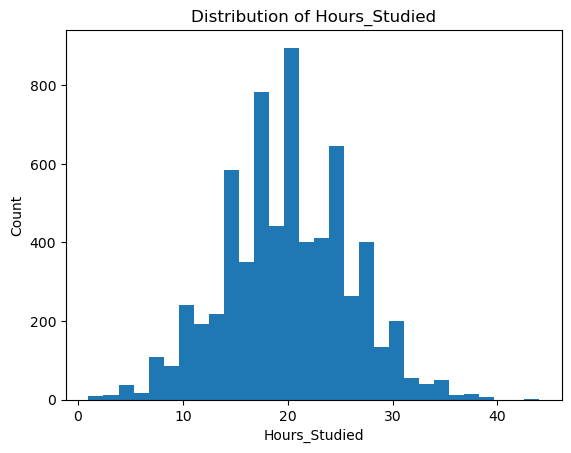

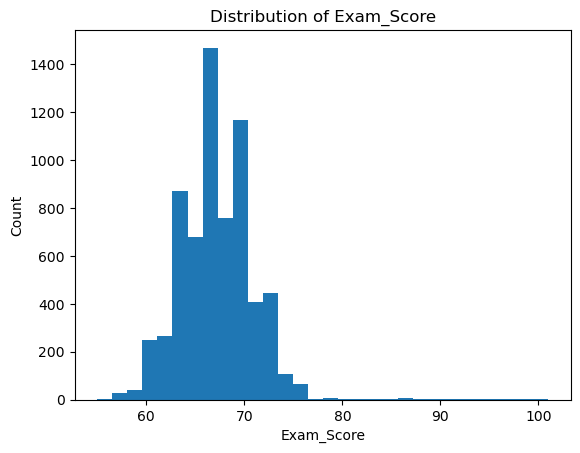

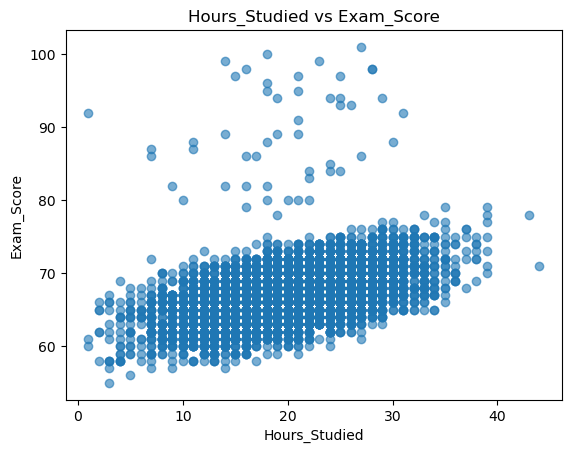

In [5]:

# Histogram: Hours_Studied
plt.figure()
plt.hist(df["Hours_Studied"], bins=30)
plt.title("Distribution of Hours_Studied")
plt.xlabel("Hours_Studied")
plt.ylabel("Count")
plt.show()

# Histogram: Exam_Score
plt.figure()
plt.hist(df["Exam_Score"], bins=30)
plt.title("Distribution of Exam_Score")
plt.xlabel("Exam_Score")
plt.ylabel("Count")
plt.show()

# Scatter: Hours_Studied vs Exam_Score
plt.figure()
plt.scatter(df["Hours_Studied"], df["Exam_Score"], alpha=0.6)
plt.title("Hours_Studied vs Exam_Score")
plt.xlabel("Hours_Studied")
plt.ylabel("Exam_Score")
plt.show()



## 4. Train/Test Split

We'll build a **simple linear regression** using only `Hours_Studied` as the predictor.
We split the data to fairly evaluate generalization:
- 80% **train** / 20% **test**
- `random_state` set for reproducibility


In [6]:

# Feature & target
X = df[["Hours_Studied"]]        # 2D array with one feature
y = df["Exam_Score"]             # 1D target

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((5285, 1), (1322, 1))


## 5. Train a Linear Regression Model

We fit a `LinearRegression` model on the training set.  
We'll also record:
- The **intercept** (baseline score when hours are zero)
- The **coefficient** (expected change in score per additional study hour)


In [7]:

linreg = LinearRegression()
linreg.fit(X_train, y_train)

intercept = linreg.intercept_
slope = linreg.coef_[0]

print("Model learned parameters:")
print("  Intercept (β₀):", round(intercept, 3))
print("  Slope     (β₁):", round(slope, 3), "points per extra study hour")


Model learned parameters:
  Intercept (β₀): 61.511
  Slope     (β₁): 0.286 points per extra study hour



## 6. Predictions & Evaluation Metrics

We'll evaluate on the **test set** using standard regression metrics:
- **MAE** (Mean Absolute Error)
- **MSE** (Mean Squared Error)
- **RMSE** (Root Mean Squared Error)
- **R²** (Coefficient of Determination)

Lower MAE/RMSE is better; R² closer to 1 is better.


In [8]:
# Predictions
y_pred = linreg.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Test set performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")


Test set performance:
MAE: 2.45
MSE: 10.86
RMSE: 3.29
R^2: 0.23



## 7. Visual Diagnostics

Two quick diagnostic plots help us see how the model behaves:
1. **Predicted vs. Actual** — good models cluster around the diagonal line.
2. **Residuals vs. Fitted** — residuals should be randomly scattered around 0.


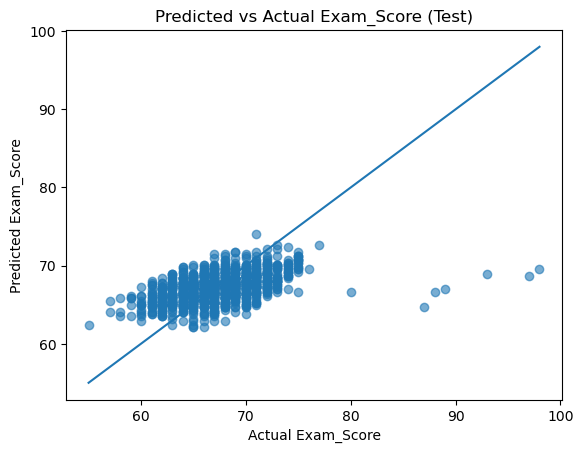

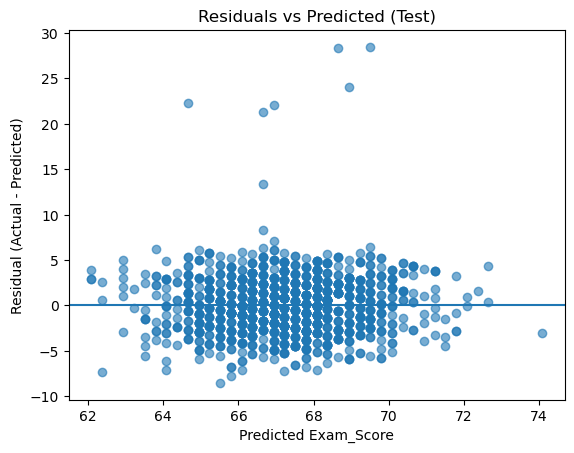

In [9]:

# Predicted vs Actual
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title("Predicted vs Actual Exam_Score (Test)")
plt.xlabel("Actual Exam_Score")
plt.ylabel("Predicted Exam_Score")
# Reference diagonal
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.show()

# Residuals plot
residuals = y_test - y_pred
plt.figure()
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0)
plt.title("Residuals vs Predicted (Test)")
plt.xlabel("Predicted Exam_Score")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()



## 8. Fitted Line Overlay (Interpretability)

To make the relationship tangible, we overlay the fitted regression line on a scatter of the full dataset.
The **slope** tells us the expected increase in score per extra study hour (holding everything else constant in this simple model).


/home/mohsin/miniconda/envs/ml_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


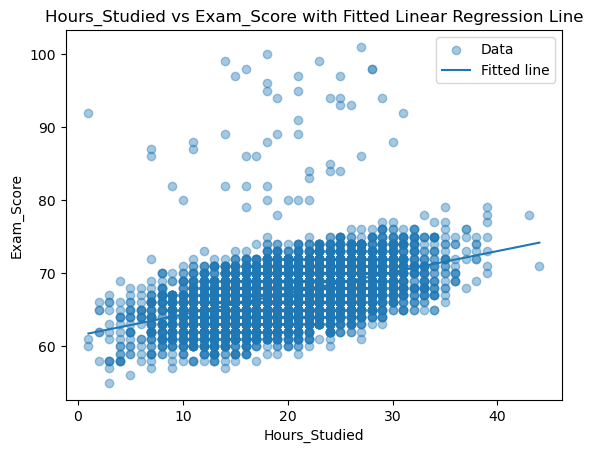

Fitted on full data — Intercept: 61.457, Slope: 0.289


In [10]:

# Fit the line on the full dataset for visualization
linreg_full = LinearRegression().fit(X, y)

# Prepare grid for a smooth line
x_grid = np.linspace(df["Hours_Studied"].min(), df["Hours_Studied"].max(), 200).reshape(-1, 1)
y_grid = linreg_full.predict(x_grid)

plt.figure()
plt.scatter(df["Hours_Studied"], df["Exam_Score"], alpha=0.4, label="Data")
plt.plot(x_grid, y_grid, label="Fitted line")
plt.title("Hours_Studied vs Exam_Score with Fitted Linear Regression Line")
plt.xlabel("Hours_Studied")
plt.ylabel("Exam_Score")
plt.legend()
plt.show()

print("Fitted on full data — Intercept: {:.3f}, Slope: {:.3f}".format(linreg_full.intercept_, linreg_full.coef_[0]))



## 9. Key Takeaways & Next Steps

- **Signal:** `Hours_Studied` is a simple, interpretable predictor of `Exam_Score`. The **slope** indicates how many points, on average, scores change per extra study hour.
- **Goodness-of-fit:** Check **R²** to see how much of the variance in `Exam_Score` is explained by study hours alone.
- **Error magnitudes:** Look at **MAE** and **RMSE** to gauge typical and squared error sizes on unseen data.

**Ideas to improve:**
- Add more features (e.g., `Attendance`, `Previous_Scores`, `Sleep_Hours`) to build a multivariate regression.
- Try regularized models (Ridge/Lasso) if adding features to control overfitting.
- Consider non-linear relationships (e.g., polynomial terms) if scatter plot suggests curvature.
- Validate with cross‑validation and analyze feature importances for multivariate models.

> This notebook intentionally focuses on a single, policy‑compliant predictor (`Hours_Studied`) to demonstrate a clean baseline and core regression workflow.
